# Reddit Clustering

For this project, we set to explore the topography of reddit. We wanted to see what subreddits are commonly used between users, if there are communities of users that act as links between subreddits, and if there are subreddits isolated from the main usern network of Reddit.

## Research Question

We are interested in clustering subreddits, by using comment and submission data to discern connections between subreddits and the users who are active in them. We are hoping to see similar userbases in subreddits we did not expect, along with disconnects in userbases between subreddits that appear intuitively similar. We want to use a Clustering algorithm to connect subreddits in space, and then calculate the distance between subreddits.We are interested in clustering subreddits, by using comment and submission data obtained from PRAW to discern connections between subreddits and the users who are active in them. We are hoping to see similar userbases in subreddits we did not expect, along with disconnections in userbases between subreddits that appear intuitively similar. We want to use a Clustering algorithm to connect subreddits in space, and then calculate the distance between subreddits. 

For the former part of research, we mainly focused on obtaining data set including reddit user, their comments and submissions for subreddits, cleaning out unnecessary features and pre-processing data for further exploration. Simple visualization of reddit posts distribution, relations between user posts number and posted subreddit number was displayed, which none of them has suggested significant results so far. For over 22,000 subreddits, there is a large portion with few data included, and handling this majority is believed to affect the following data analysis significantly. Multi-dimensional vectors implemented with array structure are also the major sources to perform data exploration and clustering on.

For the latter part, the main purpose will be completing data pre-processing,  figuring out correct application of Clustering Algorithm(method to choose, cluster number etc.) and displaying final visualization. The statistical analysis should also suggest some insights into the correlation among different subreddits and their active user community.

Several questions are expected to be answered while we proceed:

- How should we filter out the large amount of subreddits with few comments by simply removing the data or considering imputation methods? How should we determine a proper threshold for unpopular subreddits?

- K-means Clustering Algorithm seems to work for current data, but instead of presuming the number of classification arbitrarily, is there any statistical domain knowledge or library function we can refer to for more reliable output?

- The visualization in 2D space apparently fails to display more original properties for our multidimensional vectors. We need to implement proper functions to display more comprehensive data visualization, perhaps by using dimensionality reduction approach.


## Data Sources

All of our data is coming from reddit. Reddit submission and comment data is publicly accessible, and reddit has a nice API structure. We are using the package PRAW (python reddit api wrapper), which makes the reddit api calls easier to use and python importable. We are attempting to build subreddit comment vectors for a large number of reddit users. We would like to create nested dictionaries, the first level key being a reddit user, the second level keys being a subreddit name, and the values being how many time that specific user posted to a specific subreddit. 

Another important note is there are two kinds of ways to post to reddit, and the api distinguishes them. There are submissions and comments. Submissions are posts including an image, a video, or a question, and comments are replies and follow-ups to posts. Both kinds of posts on reddit are useful for the clustering we want to do, so we must do both.

We split our data scripts into different pieces, below is the documentation for each script, followed by the code. 

Also to gather any data from Reddit we must log on to the system with a developer id and create a reddit instance in our code. This happens once below.

In [1]:
import praw
import pandas as pd
import sys

reddit = praw.Reddit(client_id='tc_fFbWZrkDSRw',
                     client_secret='fTq7nFVzdkCHFZY7jWQvHmkLpwk',
                     user_agent='lhimelman')

# userNameScraper.py:
  *A Scraper that gets just usernames, does it very quickly. 6000 usernames can be collected in a few minutes*

  EX: 
      
      
      python3 userNameScraper.py *saveFilename* *ListofSubreddit* *numberofpoststolookat*
      
      python3 userNameScraper.py data.txt funny,pics,todayilearned 100

In [2]:
def scrapeUsers(reddit, subredditList, postNum):
    subnum = 0
    for subredditname in subredditList:
        users = []
        posts = reddit.subreddit(subredditname).hot(limit=postNum)
        pc = 0
        for submission in posts:
            all_comments = submission.comments.list()
            for c in all_comments:
                try:
                    name = c.author.name
                    if name not in users:
                        users.append(name)
                except:
                    pass
            pc = pc + 1
            print( pc, "post")
        subnum = subnum + 1
        print( subnum, "subreddit")
    return users

##An example call scraping one post from r/funny
users = scrapeUsers(reddit,['politics'],1)
users

1 post
1 subreddit


['TrumpImpeachedAugust',
 'zaikanekochan',
 'mmaireenehc',
 'IMAVINCEMCMAHONGUY',
 'dallasmorningnews',
 'BrokenZen',
 'Thoramel',
 'ivsciguy',
 'ArtysFartys',
 'metaldood19',
 'ExRays',
 'jimbozak',
 'hammersklavier',
 'verifex',
 'caravaggio2000',
 'Hoplophilia',
 'DoingRandomCrap31',
 'sadist-trombone',
 'Metallic144',
 'JuDGe3690',
 'worldwarli',
 'HorrorSquirrel1',
 'Amazing_Archigram',
 'beswin',
 'a_ride45',
 'darkskinnedjermaine',
 'ballmermurland',
 'hawkiron',
 'galleyest',
 'Firechess',
 'DanielTigerUppercut',
 'AsperonThorn',
 'Vernacularry',
 'highorderdetonation',
 'aoi_to_midori',
 'Markanaya',
 'ashycharasmatic',
 'Music_Tech',
 'Sporian',
 'Baltron9000',
 'bo_dingles',
 '0and18',
 'fascist___hag',
 '10iss',
 'narwhilian',
 'RedBeardOnaBike',
 'hideous_coffee',
 'BeachJas',
 'iSpoonz',
 'fullchaos40',
 'd9_m_5',
 'subpargalois',
 'stasbukh',
 'Peachy_Pineapple',
 'serothis',
 'not_even_once_okay',
 'StuStutterKing',
 'wisdom_and_frivolity',
 'Prometheus_II',
 'Yitram',


# ScrapeFreqfromUser.py:
  *A scraper that gets frequencies of comments from a list of users*

  EX: 
    
        python3 ScrapeFreqfromUser.py *savefielName* *userlistfilename*
     
    
        python3 ScrapeFreqfromUser.py freq.txt users.txt

In [3]:
def scrapeSubreddit(reddit, users):
    commentFreq = {}
    headers = []
    usernum = 1
    for user in users:
        userCFreq = {}
        for comment in reddit.redditor(user).comments.new(limit=None):
            sub = comment.subreddit
            if sub not in userCFreq:
                userCFreq[sub] = 1
            else:
                userCFreq[sub] += 1
            if sub not in headers:
                headers.append(sub)
        commentFreq[user] = userCFreq
        usernum = usernum + 1
        print(usernum, "out of", len(users))
    return commentFreq,headers

##An example call scraping the users gotten above
cfreq,headers = scrapeSubreddit(reddit, users[0:3])
df = pd.DataFrame.from_dict(data=cfreq, orient='index').fillna(0)
df

2 out of 3
3 out of 3
4 out of 3


,GamePhysics,ScottishPeopleTwitter,politics,mildlyinteresting,AskReddit,westworld,vermont,ChineseLanguage,Showerthoughts,Futurology,...,dadjokes,rarepuppers,gifsthatkeepongiving,Otterable,ThisAmericanLife,OCCaliPokemonGo,gradadmissions,nycmeetups,TrueOffMyChest,cscareerquestions
TrumpImpeachedAugust,3.0,3.0,800,2.0,1,1.0,13.0,22.0,1,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mmaireenehc,0.0,0.0,50,0.0,6,0.0,0.0,0.0,1,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,7.0,4.0,1.0
zaikanekochan,0.0,0.0,270,10.0,11,0.0,0.0,0.0,3,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# ScrapeSubFreqfromUser.py:
  *A scraper that gets frequencies of submissions from a list of users*

  EX: 
    
        python3 ScrapeSubFreqfromUser.py *savefielName* *userlistfilename*
     
    
        python3 ScrapeSubFreqfromUser.py freq.txt users.txt

In [4]:
def scrapeSubreddit(reddit, users):
    subFreq = {}
    headers = []
    usernum = 1
    for user in users:
        userCFreq = {}
        for submission in reddit.redditor(user).submissions.new(limit=None):
            sub = submission.subreddit
            if sub not in userCFreq:
                userCFreq[sub] = 1
            else:
                userCFreq[sub] += 1
            if sub not in headers:
                headers.append(sub)
        subFreq[user] = userCFreq
        usernum = usernum + 1
        print(usernum, "out of", len(users))
    return subFreq,headers

subfreq,headers = scrapeSubreddit(reddit, users[0:3])
df = pd.DataFrame.from_dict(data=subfreq, orient='index').fillna(0)
df

2 out of 3
3 out of 3
4 out of 3


,cursedimages,GamePhysics,reactiongifs,politics,Birds_Stealing_Things,Overwatch,CatsStandingUp,shittyreactiongifs,HappyCakeDayClub,LifeProTips,...,mildlyinfuriating,pokemon,tattoos,gaming,berkeley,howyoudoin,PandR,SouthBayLA,electricdaisycarnival,arresteddevelopment
TrumpImpeachedAugust,1.0,1.0,1.0,192.0,5.0,6.0,1.0,1.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mmaireenehc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,3.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
zaikanekochan,0.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


At this point, we have two sparse matrices in which each column is a vector for an individual subreddit that contains frequencies of different users posting to or commenting on that subreddit.

***
The above calls are examples of running our scripts, but of course our actual data sets, (which we only want to pull down once), are much larger.
***

## Data Cleaning

The data came to us pretty clean. Reddit's api allows us to filter deleted comments and such. Our data cleaning and preprocessing included three different tasks. Below is the first 100 rows of our large table, and then a description of each task. 

In [5]:
bigdf = pd.read_csv('../data.csv',nrows=100)
bigdf

,Unnamed: 0,cocktails,AskReddit,videos,hearthstone,PUBATTLEGROUNDS,dontdeadopeninside,CompetitiveHS,funny,TWWPRDT,...,firefall,KUFIIOnline,atlantar4r,HeadBangToThis,Kochen,aachen,KnitRequest,petplay,Balls,peachfuzz
0,--abadox--,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0,67.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,--arete--,0.0,0.0,0.0,0.0,0.0,2.0,0.0,7.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-COPBLOCK-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-Chakas-,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-DisobedientAvocado-,0.0,61.0,0.0,0.0,0.0,0.0,0.0,24.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,-Enrique_Shockwave-,0.0,3.0,0.0,2.0,0.0,40.0,0.0,50.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,-FuckYourGod,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,-KyloRen,0.0,2.0,0.0,0.0,0.0,0.0,0.0,5.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,-Mateo-,0.0,0.0,0.0,0.0,0.0,4.0,0.0,2.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,-Meik,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Task One:
    
    Create a method for removing very sparse vectors from our dataset. In looking through the data, we realized that there are some subreddits with really very few posts, that appears in our set of vectors without really doing anything. We decided to test clustering with the whole set and with smaller sets, so we made a way of thresholding how many posts a subreddit needs to be oncluded

In [6]:
Threshold = 1000

def delSparse(df, threshold):
    for c in list(df)[1:]:
        if sum(list(df[c])) < Threshold:
            del df[c]
            
delSparse(bigdf,Threshold)
print(bigdf)

              Unnamed: 0  funny  TWWPRDT  Damnthatsinteresting  Overwatch  \
0             --abadox--   56.0     67.0                   0.0       49.0   
1              --arete--    7.0      7.0                   6.0        1.0   
2             -COPBLOCK-    0.0      1.0                   1.0        0.0   
3               -Chakas-    0.0     60.0                  11.0       15.0   
4   -DisobedientAvocado-   24.0     14.0                  46.0       38.0   
5    -Enrique_Shockwave-   50.0     30.0                   0.0        1.0   
6           -FuckYourGod    0.0     39.0                  48.0       76.0   
7               -KyloRen    5.0     14.0                   7.0        1.0   
8                -Mateo-    2.0      3.0                   6.0        4.0   
9                  -Meik    0.0      2.0                   0.0        0.0   
10           -Moonchild-    0.0     35.0                   3.0       31.0   
11         -Mr_Rogers_II   30.0      1.0                  11.0        2.0   

# Task Two:
    Format data so it is in the form expected by the clustering algorithm. The following code takes the dataframe and changes it to a numpy array. The code also saves a list of headers for referencing specific nodes in a cluster later.
    
    

In [7]:
from numpy import array

def changetoVec(df):
    vectors = []
    for c in list(df)[1:]:
        vectors.append(list(df[c]))

    return array(vectors)

bigdfVec = changetoVec(bigdf)
print(bigdfVec[0:10,0:14])

[[ 56.   7.   0.   0.  24.  50.   0.   5.   2.   0.   0.  30.   1.   0.]
 [ 67.   7.   1.  60.  14.  30.  39.  14.   3.   2.  35.   1.   9.   1.]
 [  0.   6.   1.  11.  46.   0.  48.   7.   6.   0.   3.  11.   0.   2.]
 [ 49.   1.   0.  15.  38.   1.  76.   1.   4.   0.  31.   2.   1.   0.]
 [ 54.   4.   1.   1.   6.  15.   0.   2.   3.   0.   0.  23.   0.   0.]
 [  0.  10.   0.  13.  14.   4.   0.   1.  10.   0.   4.  25.   5.   0.]
 [  1.  27.   0.  21. 119. 119. 507.   4.   3.   1.   4.  19.  26.   0.]
 [  0.   4.   0.  22.  33.  29.   0.  12.  38.   1.   0.  22.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 671.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   3.   0.   0.   0.   0.   0.   0.]]


# Task Three:
    Remove Porn. What we discovered is that most porn subreddits fell under the category of incredibly sparse vectors, and so were removed, the ones that didn't we decided to include in our analysis for now. 

## Try clustering:

In [8]:
from scipy.cluster.vq import vq, kmeans, whiten
import matplotlib.pyplot as plt



def Cluster(vectors, Num_clusters):
    whitened = whiten(vectors)
    codebook, distortion = kmeans(whitened, Num_clusters)
    return codebook, distortion

cb, dist = Cluster(bigdfVec[1:1000],3)
whitened = whiten(bigdfVec[1:1000])
print(cb)
print(dist)


[[0.03704551 3.42219579 0.         1.1972581  3.38270877 3.28812374
  3.2668365  0.83834358 0.26842096 1.45999279 0.01920797 1.85301222
  3.19440902 0.         0.         0.33092202 1.02813697 2.83817699
  3.25396991 0.13568011 3.08117833 0.         3.3883819  1.69320243
  3.33199487 2.16792097 3.3106008  3.19184715 3.24995451 2.62964497
  3.21329408 3.07349138 0.         2.27339324 3.21993789 2.71847191
  1.44352638 1.50908182 3.34036597 0.         2.34081434 2.85550524
  3.22775721 0.60540551 3.11134823 3.46857437 0.10497185 0.25392126
  1.68341303 1.50258623 0.18043356 3.23725811 3.33140218 0.
  2.28600229 0.0708298  2.21748503 2.3434004  3.06679202 3.35410197
  2.87124649 3.10618262 1.06810349 0.07349817 1.5        3.28071204
  0.         3.26547581 0.20137669 2.77974346 3.43863277 0.04595054
  3.21412902 2.22478072 3.20079042 0.         1.5694646  0.27994039
  0.05025228 0.84558704 1.         0.         3.28150741 2.19181164
  0.         0.         2.84696666 2.30473379 0.11100257

# Data Visualization

    So lets plot our Clusters! right?
    

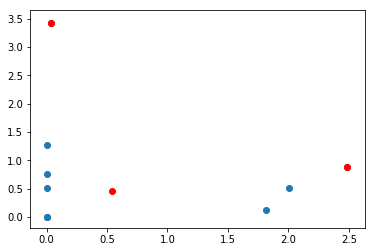

In [9]:
plt.scatter(whitened[:, 0], whitened[:, 1])
plt.scatter(cb[:, 0], cb[:, 1], c='r')
plt.show()

Thats weird, lets try a different set of data?

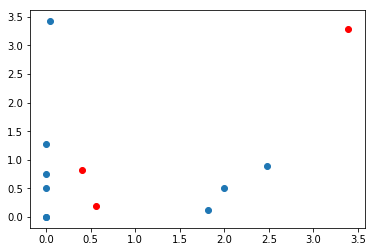

In [19]:
plt.scatter(whitened[:, 0], whitened[:, 1])
plt.scatter(cb[:, 2], cb[:, 3], c='r')
plt.show()

# Whats going on?
    Our vectors are n-dimensional, trying to plot them in 2-dimensional space is not gonna work. There are so many zeros because many of these vectors have zero in a number of dimensions, but are still important vectors. A big next challenge is to effectively visualize this data.

# Statistical Analysis

To perform statistical analysis on our data, we read in small data set. Both .csv files contain the same users. One file contains a user's comment frequency data, and the other contains that same user's submission frequency data.

In [11]:
donaldc = pd.read_csv('donaldCFreq.csv')
donalds = pd.read_csv('donaldSFreq.csv')

print("DonaldCFreq:")
print(donaldc)
print("donaldSFreq:")
print(donalds)

DonaldCFreq:
               Unnamed: 0  thedonald  todayilearned  news  bestoflegaladvice  \
0                 A-A-V-E        0.0            0.0   0.0                0.0   
1              Adelleda25        0.0            0.0   0.0                0.0   
2            ArrantPariah        0.0            0.0   0.0                0.0   
3           BarzTheOrange        0.0            0.0   1.0                0.0   
4          CallTheKiteman        0.0            0.0   7.0                0.0   
5          CannotStopEver        0.0            0.0   0.0                0.0   
6    CommonMisspellingBot        0.0            0.0   1.0                0.0   
7          Common_Fanfare        0.0            0.0   0.0                0.0   
8               Dieseldad        0.0            0.0   0.0                0.0   
9         Emmenthalreddit        0.0            0.0   0.0                0.0   
10        FixBayonetsLads        0.0            0.0   0.0                0.0   
11         GThaDeplorable  

In [12]:
#dataframe for donaldc
donaldc["total_comments"] = donaldc.sum(axis = 1)
donaldc["total_comments"]

0       736.0
1       177.0
2       998.0
3        66.0
4       998.0
5      1000.0
6      1000.0
7       254.0
8       755.0
9       273.0
10      639.0
11       23.0
12      999.0
13       17.0
14       17.0
15     1000.0
16        5.0
17      419.0
18      999.0
19     1000.0
20       28.0
21        1.0
22      130.0
23      211.0
24      563.0
25       40.0
26       41.0
27      440.0
28       74.0
29       23.0
        ...  
75       27.0
76     1000.0
77      358.0
78     1000.0
79        2.0
80       27.0
81     1000.0
82       16.0
83        1.0
84        7.0
85     1000.0
86      100.0
87       81.0
88      999.0
89      603.0
90     1000.0
91      992.0
92        4.0
93        4.0
94       32.0
95       37.0
96     1000.0
97      294.0
98      791.0
99      999.0
100     426.0
101     996.0
102    1000.0
103     410.0
104     755.0
Name: total_comments, Length: 105, dtype: float64

In [13]:
#dataframe for donalds
donalds["total_submissions"] = donalds.sum(axis = 1)
donalds["total_submissions"]

0       61.0
1        8.0
2     1000.0
3        7.0
4       25.0
5      263.0
6        1.0
7       18.0
8       23.0
9        1.0
10     285.0
11     157.0
12       6.0
13      37.0
14       2.0
15      12.0
16      13.0
17     157.0
18       2.0
19      31.0
20      42.0
21     167.0
22      52.0
23      27.0
24      32.0
25       3.0
26       4.0
27      28.0
28       7.0
29     285.0
       ...  
59      85.0
60      33.0
61      51.0
62      15.0
63     258.0
64       4.0
65      22.0
66      35.0
67     266.0
68       4.0
69      11.0
70     216.0
71       1.0
72      60.0
73       7.0
74       4.0
75     338.0
76      10.0
77     116.0
78     100.0
79       1.0
80     240.0
81      85.0
82     273.0
83      23.0
84       6.0
85      56.0
86     163.0
87      25.0
88      11.0
Name: total_submissions, Length: 89, dtype: float64

In [32]:
donaldCombined = pd.DataFrame()
donaldCombined["#Comments"] = donaldc["total_comments"]
donaldCombined["#Submissions"] = donalds["total_submissions"]
donaldCombined = donaldCombined.dropna()
donaldCombined

,#Comments,#Submissions
0,736.0,61.0
1,177.0,8.0
2,998.0,1000.0
3,66.0,7.0
4,998.0,25.0
5,1000.0,263.0
6,1000.0,1.0
7,254.0,18.0
8,755.0,23.0
9,273.0,1.0


Delete submissions > 800:

In [36]:
donaldCombined = donaldCombined[donaldCombined["#Submissions"] < 800] 
donaldCombined

,#Comments,#Submissions,#Comments_Z,#Submissions_Z
0,736.0,61.0,0.570184,-0.102799
1,177.0,8.0,-0.731940,-0.657961
3,66.0,7.0,-0.990502,-0.668436
4,998.0,25.0,1.180482,-0.479890
5,1000.0,263.0,1.185140,2.013103
6,1000.0,1.0,1.185140,-0.731284
7,254.0,18.0,-0.552578,-0.553214
8,755.0,23.0,0.614442,-0.500840
9,273.0,1.0,-0.508320,-0.731284
10,639.0,285.0,0.344234,2.243548


Now, calculate Z scores to normalize the data, so we can perform statistical analysis.

In [38]:
import scipy.stats

donaldCombined['#Comments_Z'] = scipy.stats.zscore(donaldCombined['#Comments'])
donaldCombined['#Submissions_Z'] = scipy.stats.zscore(donaldCombined['#Submissions'])

Scatter plot of Z scores:

<function matplotlib.pyplot.show>

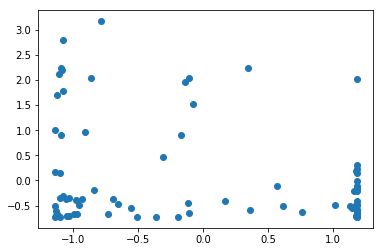

In [39]:
#scatter plot of Z scores
plt.scatter(donaldCombined['#Comments_Z'], donaldCombined['#Submissions_Z'])
plt.show

Run Pearson Correlation Coefficient to find correlation between two columns:

In [41]:
donaldCombined['#Comments_Z'].corr(donaldCombined['#Submissions_Z'])

-0.2502883614144011

The correlation coefficient is about -0.25, making it somewhat anti-correlated. While this is not a very strong anti-correlation, it might still be assumed that users who comment a lot do not post submissions.